## Garment Segmentation project

### The Data

In [2]:
import os
import cv2     
import glob
import numpy as np
from tqdm import tqdm
from keras.preprocessing import image                  
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


file_img_paths = sorted(glob.glob("./input_CP/original/*.png"))
file_seg_paths = sorted(glob.glob("./input_CP/masks/*.png"))     
    
orig_train = file_img_paths[0:900]
orig_valid = file_img_paths[900:]
seg_train = file_seg_paths[0:900]
seg_valid = file_seg_paths[900:]


# print statistics about the dataset
print('There are %s total images.\n' % len(np.hstack([orig_train, orig_valid, seg_train, seg_valid])))
print('There are %d training images.' % len(orig_train))
print('There are %d training mask images.' % len(seg_train))
print('There are %d validation images.' % len(orig_valid))
print('There are %d validation mask images.' % len(seg_valid))

print(len(orig_train))
print(len(seg_train))
print(len(orig_valid))
print(len(seg_valid))


Using TensorFlow backend.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


There are 2168 total images.

There are 900 training images.
There are 900 training mask images.
There are 184 validation images.
There are 184 validation mask images.
900
900
184
184


### The Model

In [3]:
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Activation, UpSampling2D, BatchNormalization

def unet_1024_segmentation_model(input_shape=(1024, 1024, 3), num_classes=1):
    inputs = Input(shape=input_shape)
    # 1024

    down0b = Conv2D(8, (3, 3), padding='same')(inputs)
    down0b = BatchNormalization()(down0b)
    down0b = Activation('relu')(down0b)
    down0b = Conv2D(8, (3, 3), padding='same')(down0b)
    down0b = BatchNormalization()(down0b)
    down0b = Activation('relu')(down0b)
    down0b_pool = MaxPooling2D((2, 2), strides=(2, 2))(down0b)
    # 512

    down0a = Conv2D(16, (3, 3), padding='same')(down0b_pool)
    down0a = BatchNormalization()(down0a)
    down0a = Activation('relu')(down0a)
    down0a = Conv2D(16, (3, 3), padding='same')(down0a)
    down0a = BatchNormalization()(down0a)
    down0a = Activation('relu')(down0a)
    down0a_pool = MaxPooling2D((2, 2), strides=(2, 2))(down0a)
    # 256

    down0 = Conv2D(32, (3, 3), padding='same')(down0a_pool)
    down0 = BatchNormalization()(down0)
    down0 = Activation('relu')(down0)
    down0 = Conv2D(32, (3, 3), padding='same')(down0)
    down0 = BatchNormalization()(down0)
    down0 = Activation('relu')(down0)
    down0_pool = MaxPooling2D((2, 2), strides=(2, 2))(down0)
    # 128

    down1 = Conv2D(64, (3, 3), padding='same')(down0_pool)
    down1 = BatchNormalization()(down1)
    down1 = Activation('relu')(down1)
    down1 = Conv2D(64, (3, 3), padding='same')(down1)
    down1 = BatchNormalization()(down1)
    down1 = Activation('relu')(down1)
    down1_pool = MaxPooling2D((2, 2), strides=(2, 2))(down1)
    # 64

    down2 = Conv2D(128, (3, 3), padding='same')(down1_pool)
    down2 = BatchNormalization()(down2)
    down2 = Activation('relu')(down2)
    down2 = Conv2D(128, (3, 3), padding='same')(down2)
    down2 = BatchNormalization()(down2)
    down2 = Activation('relu')(down2)
    down2_pool = MaxPooling2D((2, 2), strides=(2, 2))(down2)
    # 32

    down3 = Conv2D(256, (3, 3), padding='same')(down2_pool)
    down3 = BatchNormalization()(down3)
    down3 = Activation('relu')(down3)
    down3 = Conv2D(256, (3, 3), padding='same')(down3)
    down3 = BatchNormalization()(down3)
    down3 = Activation('relu')(down3)
    down3_pool = MaxPooling2D((2, 2), strides=(2, 2))(down3)
    # 16

    down4 = Conv2D(512, (3, 3), padding='same')(down3_pool)
    down4 = BatchNormalization()(down4)
    down4 = Activation('relu')(down4)
    down4 = Conv2D(512, (3, 3), padding='same')(down4)
    down4 = BatchNormalization()(down4)
    down4 = Activation('relu')(down4)
    down4_pool = MaxPooling2D((2, 2), strides=(2, 2))(down4)
    # 8

    center = Conv2D(1024, (3, 3), padding='same')(down4_pool)
    center = BatchNormalization()(center)
    center = Activation('relu')(center)
    center = Conv2D(1024, (3, 3), padding='same')(center)
    center = BatchNormalization()(center)
    center = Activation('relu')(center)
    # center

    up4 = UpSampling2D((2, 2))(center)
    up4 = concatenate([down4, up4], axis=3)
    up4 = Conv2D(512, (3, 3), padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)
    up4 = Conv2D(512, (3, 3), padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)
    up4 = Conv2D(512, (3, 3), padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)
    # 16

    up3 = UpSampling2D((2, 2))(up4)
    up3 = concatenate([down3, up3], axis=3)
    up3 = Conv2D(256, (3, 3), padding='same')(up3)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)
    up3 = Conv2D(256, (3, 3), padding='same')(up3)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)
    up3 = Conv2D(256, (3, 3), padding='same')(up3)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)
    # 32

    up2 = UpSampling2D((2, 2))(up3)
    up2 = concatenate([down2, up2], axis=3)
    up2 = Conv2D(128, (3, 3), padding='same')(up2)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)
    up2 = Conv2D(128, (3, 3), padding='same')(up2)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)
    up2 = Conv2D(128, (3, 3), padding='same')(up2)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)
    # 64

    up1 = UpSampling2D((2, 2))(up2)
    up1 = concatenate([down1, up1], axis=3)
    up1 = Conv2D(64, (3, 3), padding='same')(up1)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)
    up1 = Conv2D(64, (3, 3), padding='same')(up1)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)
    up1 = Conv2D(64, (3, 3), padding='same')(up1)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)
    # 128

    up0 = UpSampling2D((2, 2))(up1)
    up0 = concatenate([down0, up0], axis=3)
    up0 = Conv2D(32, (3, 3), padding='same')(up0)
    up0 = BatchNormalization()(up0)
    up0 = Activation('relu')(up0)
    up0 = Conv2D(32, (3, 3), padding='same')(up0)
    up0 = BatchNormalization()(up0)
    up0 = Activation('relu')(up0)
    up0 = Conv2D(32, (3, 3), padding='same')(up0)
    up0 = BatchNormalization()(up0)
    up0 = Activation('relu')(up0)
    # 256

    up0a = UpSampling2D((2, 2))(up0)
    up0a = concatenate([down0a, up0a], axis=3)
    up0a = Conv2D(16, (3, 3), padding='same')(up0a)
    up0a = BatchNormalization()(up0a)
    up0a = Activation('relu')(up0a)
    up0a = Conv2D(16, (3, 3), padding='same')(up0a)
    up0a = BatchNormalization()(up0a)
    up0a = Activation('relu')(up0a)
    up0a = Conv2D(16, (3, 3), padding='same')(up0a)
    up0a = BatchNormalization()(up0a)
    up0a = Activation('relu')(up0a)
    # 512

    up0b = UpSampling2D((2, 2))(up0a)
    up0b = concatenate([down0b, up0b], axis=3)
    up0b = Conv2D(8, (3, 3), padding='same')(up0b)
    up0b = BatchNormalization()(up0b)
    up0b = Activation('relu')(up0b)
    up0b = Conv2D(8, (3, 3), padding='same')(up0b)
    up0b = BatchNormalization()(up0b)
    up0b = Activation('relu')(up0b)
    up0b = Conv2D(8, (3, 3), padding='same')(up0b)
    up0b = BatchNormalization()(up0b)
    up0b = Activation('relu')(up0b)
    # 1024

    classify = Conv2D(num_classes, (1, 1), activation='sigmoid')(up0b)

    model = Model(inputs=inputs, outputs=classify)

    return model



In [4]:
model = unet_1024_segmentation_model()
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1024, 1024, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1024, 1024, 8 224         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 1024, 1024, 8 32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 1024, 1024, 8 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (


### Introducing our own loss funtions

In [5]:
import keras.backend as K
from keras.losses import binary_crossentropy, mean_squared_error

def dice_coeff(y_true, y_pred):
    smooth = 1
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def bce_dice_loss(y_true, y_pred):
    loss = 0.5 * binary_crossentropy(y_true, y_pred) - 2*dice_coeff(y_true, y_pred)
    return loss

def plateau_then_triangular_lr(epocs):
    plateau_steps = 4
    step_size = 2
    min_lr = 1e-5
    max_lr = 1e-2
    
    if epocs < plateau_steps:
        return (min_lr + max_lr)/2
    
    cycle = np.floor(1+epocs/(2*step_size))
    x = np.abs(epocs/step_size - 2*cycle + 1)
    lr = min_lr + (max_lr - min_lr) * np.maximum(0, (1-x))/float(1.0**(cycle-1))
    return lr

def plateau_then_decl_triangular_lr(epocs):
    plateau_steps = 4
    step_size = 5 
    min_lr = 1e-6
    max_lr = 5e-4
    
    if epocs < plateau_steps:
        return (min_lr + max_lr)/2
    
    cycle = np.floor(1+epocs/(2*step_size))
    x = np.abs(epocs/step_size - 2*cycle + 1)
    lr = min_lr + (max_lr - min_lr) * np.maximum(0, (1-x))/float(1.2**(cycle-1))
    return lr



In [6]:
from keras.optimizers import RMSprop, Adam, Adadelta

# Transfer learning by using already trained model on this dataset. The hope is that starting with these weights we will
# see improved performance and better generalization capabilities.
model.load_weights("./weights/unet_1024_no_mask.hdf5")

model.compile(optimizer=RMSprop(lr=3e-4), loss=bce_dice_loss, metrics=['accuracy', dice_coeff])


### Illustrate our progress

In [7]:
# A little plot helper allowing us to visualise the result
def plot_training(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    dice_coeff = history.history['dice_coeff']
    val_dice_coeff = history.history['val_dice_coeff']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, 'r.')
    plt.plot(epochs, val_loss, 'r-')
    plt.title('Training and validation loss')

    plt.figure()

    plt.plot(epochs, dice_coeff, 'r.')
    plt.plot(epochs, val_dice_coeff, 'r-')
    plt.title('Training and validation Dice coef.')

    plt.show()

### Data argumentation

#### Image manipulation functions
In our code, we’re using the 3 image manipulation functions from petrosgk’s Carvana example (<https://github.com/petrosgk/Kaggle-Carvana-Image-Masking-Challenge/blob/master/train.py>) to randomly alter the hue, saturation, and value of the image (HSV color space), and to randomly shift, scale, rotate and flip the image. 

In [8]:
def randomHueSaturationValue(image, hue_shift_limit=(-180, 180), sat_shift_limit=(-255, 255),
                             val_shift_limit=(-255, 255), u=0.5):
    if np.random.random() < u:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(image)
        hue_shift = np.random.uniform(hue_shift_limit[0], hue_shift_limit[1])
        h = cv2.add(h, hue_shift)
        sat_shift = np.random.uniform(sat_shift_limit[0], sat_shift_limit[1])
        s = cv2.add(s, sat_shift)
        val_shift = np.random.uniform(val_shift_limit[0], val_shift_limit[1])
        v = cv2.add(v, val_shift)
        image = cv2.merge((h, s, v))
        image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)

    return image


def randomShiftScaleRotate(image, mask, shift_limit=(-0.0625, 0.0625),
                           scale_limit=(-0.1, 0.1), rotate_limit=(-45, 45), aspect_limit=(0, 0),
                           borderMode=cv2.BORDER_CONSTANT, u=0.5):
    if np.random.random() < u:
        height, width, channel = image.shape

        angle = np.random.uniform(rotate_limit[0], rotate_limit[1])  # degree
        scale = np.random.uniform(1 + scale_limit[0], 1 + scale_limit[1])
        aspect = np.random.uniform(1 + aspect_limit[0], 1 + aspect_limit[1])
        sx = scale * aspect / (aspect ** 0.5)
        sy = scale / (aspect ** 0.5)
        dx = round(np.random.uniform(shift_limit[0], shift_limit[1]) * width)
        dy = round(np.random.uniform(shift_limit[0], shift_limit[1]) * height)

        cc = np.math.cos(angle / 180 * np.math.pi) * sx
        ss = np.math.sin(angle / 180 * np.math.pi) * sy
        rotate_matrix = np.array([[cc, -ss], [ss, cc]])

        box0 = np.array([[0, 0], [width, 0], [width, height], [0, height], ])
        box1 = box0 - np.array([width / 2, height / 2])
        box1 = np.dot(box1, rotate_matrix.T) + np.array([width / 2 + dx, height / 2 + dy])

        box0 = box0.astype(np.float32)
        box1 = box1.astype(np.float32)
        mat = cv2.getPerspectiveTransform(box0, box1)
        image = cv2.warpPerspective(image, mat, (width, height), flags=cv2.INTER_LINEAR, borderMode=borderMode,
                                    borderValue=(0, 0, 0,))
        mask = cv2.warpPerspective(mask, mat, (width, height), flags=cv2.INTER_LINEAR, borderMode=borderMode,
                                   borderValue=(0, 0, 0,))

    return image, mask


def randomHorizontalFlip(image, mask, u=0.5):
    if np.random.random() < u:
        image = cv2.flip(image, 1)
        mask = cv2.flip(mask, 1)

    return image, mask

#### The data generators. 
In order to make the most of our few training examples, we will "augment" them via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.

In [9]:
input_size = 1024
batch_size = 2

# This is the augmentation configuration we will use for training
def train_generator(img_fnames, seg_fnames):
    while True:
        for start in range(0, len(img_fnames), batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, len(img_fnames))
            for index in range(start, end):
                img = cv2.imread(img_fnames[index])
                img = cv2.resize(img, (input_size, input_size))                
                seg = cv2.imread(seg_fnames[index], cv2.IMREAD_GRAYSCALE)
                seg = cv2.resize(seg, (input_size, input_size))
                img = randomHueSaturationValue(img,
                                               hue_shift_limit=(-50, 50),
                                               sat_shift_limit=(-5, 5),
                                               val_shift_limit=(-15, 15))
                img, mask = randomShiftScaleRotate(img, seg,
                                                   shift_limit=(-0.01, 0.01),
                                                   scale_limit=(-0.1, 0.1),
                                                   rotate_limit=(-5, 5))
                img, seg = randomHorizontalFlip(img, seg)
                seg = np.expand_dims(seg, axis=2)
                x_batch.append(img)
                y_batch.append(seg)
            x_batch = np.array(x_batch, np.float32) / 255
            y_batch = np.array(y_batch, np.float32) / 255
            yield x_batch, y_batch
            
# This is the augmentation configuration we will use for validation. Note there are no 
# data augmentation for validation data             
def valid_generator(img_fnames, seg_fnames):
    while True:
        for start in range(0, len(img_fnames), batch_size):
            x_batch = []
            y_batch = []
            end = min(start + batch_size, len(img_fnames))
            for index in range(start, end):
                img = cv2.imread(img_fnames[index])
                img = cv2.resize(img, (input_size, input_size))
                seg = cv2.imread(seg_fnames[index], cv2.IMREAD_GRAYSCALE)
                seg = cv2.resize(seg, (input_size, input_size))
                seg = np.expand_dims(seg, axis=2)
                x_batch.append(img)
                y_batch.append(seg)
            x_batch = np.array(x_batch, np.float32) / 255
            y_batch = np.array(y_batch, np.float32) / 255
            yield x_batch, y_batch


### Training time!!!

Epoch 1/100
 - 645s - loss: -1.6419e+00 - acc: 0.9795 - dice_coeff: 0.8690 - val_loss: -1.9413e+00 - val_acc: 0.9951 - val_dice_coeff: 0.9765
Epoch 2/100
 - 580s - loss: -1.6814e+00 - acc: 0.9797 - dice_coeff: 0.8727 - val_loss: -1.9235e+00 - val_acc: 0.9943 - val_dice_coeff: 0.9681
Epoch 3/100
 - 580s - loss: -1.6773e+00 - acc: 0.9795 - dice_coeff: 0.8662 - val_loss: -1.9227e+00 - val_acc: 0.9944 - val_dice_coeff: 0.9674
Epoch 4/100
 - 579s - loss: -1.6810e+00 - acc: 0.9797 - dice_coeff: 0.8664 - val_loss: -1.9295e+00 - val_acc: 0.9948 - val_dice_coeff: 0.9703
Epoch 5/100
 - 580s - loss: -1.6926e+00 - acc: 0.9800 - dice_coeff: 0.8708 - val_loss: -1.9231e+00 - val_acc: 0.9945 - val_dice_coeff: 0.9672
Epoch 6/100
 - 580s - loss: -1.6841e+00 - acc: 0.9793 - dice_coeff: 0.8667 - val_loss: -1.9253e+00 - val_acc: 0.9947 - val_dice_coeff: 0.9683
Epoch 7/100
 - 580s - loss: -1.6966e+00 - acc: 0.9802 - dice_coeff: 0.8717 - val_loss: -1.9231e+00 - val_acc: 0.9944 - val_dice_coeff: 0.9670
Epoch 

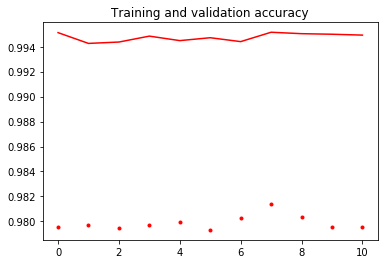

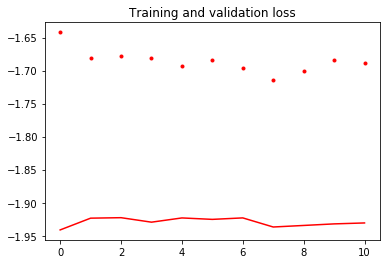

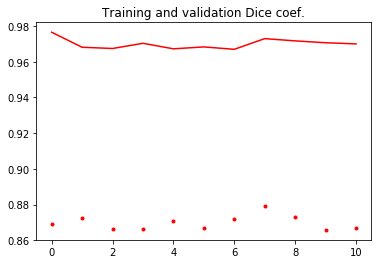

In [10]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard

epochs = 100

def train():
        
    callbacks = [EarlyStopping(monitor='val_loss', patience=10, verbose=2, min_delta=1e-4),
                 LearningRateScheduler(plateau_then_decl_triangular_lr),
                 ModelCheckpoint(monitor='val_loss', filepath='./weights/unet_no_mask_1024_augmentation_with_rotation.hdf5', 
                                 save_best_only=True, save_weights_only=True),
                 TensorBoard(log_dir='./logs')]

    history = model.fit_generator(generator=train_generator(orig_train, seg_train),
                    steps_per_epoch=np.ceil(float(len(orig_train)) / float(batch_size)),
                    epochs=epochs, verbose=2, callbacks=callbacks,
                    validation_data=valid_generator(orig_valid, seg_valid),
                    validation_steps=np.ceil(float(len(orig_valid)) / float(batch_size)))
    
    plot_training(history)

    
# Let's do it!
train()
